# Handwritten Digits Classification using simple Neural Network


In [ ]:
#Importing the necessary libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## Load MNIST dataset

The **MNIST (Modified National Institute of Standards and Technology)** dataset is a large database of **handwritten digits** commonly used for training and testing various machine learning models. It consists of **60,000 training images** and **10,000 testing images**. Each image is a **28x28 pixel** grayscale image of a single digit between 0 and 9.

Here's a brief overview of its structure:

* **Training set**: 60,000 examples.
* **Test set**: 10,000 examples.
* **Image size**: 28x28 pixels.
* **Number of classes**: 10 (digits 0 through 9).

Now we will load the MNIST dataset using keras and split the dataset into training and testing sets.

In [ ]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


## Exploring the dataset

In [ ]:
len(X_train)

60000

In [ ]:
len(X_test)

10000

In [ ]:
len(y_train)

60000

In [ ]:
len(y_test)

10000

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

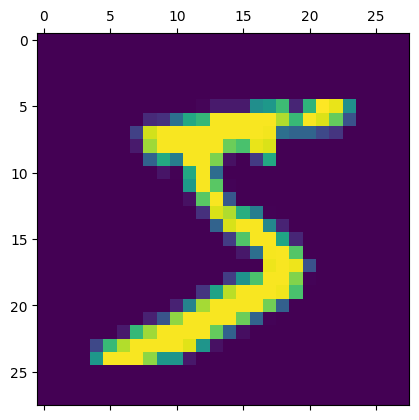

In [ ]:
plt.matshow(X_train[0])

## Preprocessing


In [ ]:
X_train.shape

(60000, 28, 28)

Here we need to chage this 28 * 28 2D array into 784 1D array. This is called **flattening**.


It is a necessary step before feeding the data into certain layers of a neural network, such as a fully connected (dense) layer.

And for this either we can manually reshape(i.e flatten) the train and test data as shown just below or we can directly include the flatten command while designing a neural network(which we will create later).

In [ ]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [38]:
print(X_train_flattened.shape)
print(X_test_flattened.shape)

(60000, 784)
(10000, 784)


**Scaling (or normalizing)** the MNIST dataset is an important preprocessing step for many machine learning algorithms. It helps to standardize the range of the pixel values so that the model trains more efficiently. In the MNIST dataset, the pixel values **range from 0 to 255**. By scaling, we typically transform these values to a **range of 0 to 1**.

Using `MinMaxScaler` on the MNIST Dataset

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
X_train_flattened = scaler.fit_transform(X_train_flattened)
X_test_flattened = scaler.fit_transform(X_test_flattened)

## Define Model

The Sequential model is very straightforward and simple. It allows to build a model layer by layer. So, here we use the Sequential model. This model has one input layer, one output layer.

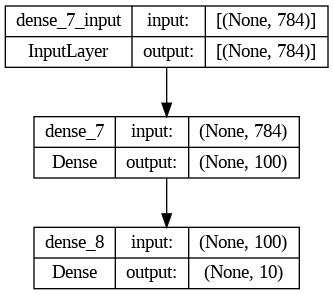

In [41]:
from tensorflow.keras import layers, Sequential
from tensorflow.keras.utils import plot_model
from IPython.display import Image

#defining the model
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

#visualize the model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
Image(filename='model.png')



In [42]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Epoch 1/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0163 - accuracy: 0.9950 - val_loss: 0.0161 - val_accuracy: 0.9945
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0124 - accuracy: 0.9965 - val_loss: 0.0173 - val_accuracy: 0.9942
Epoch 3/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0124 - accuracy: 0.9961 - val_loss: 0.0277 - val_accuracy: 0.9902
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0093 - accuracy: 0.9971 - val_loss: 0.0234 - val_accuracy: 0.9921
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0075 - accuracy: 0.9980 - val_loss: 0.0305 - val_accuracy: 0.9893
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0087 - accuracy: 0.9974 - val_loss: 0.0283 - val_accuracy: 0.9914
Epoch 7/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0054 - accuracy: 0.9985 - val_loss: 0.0351 - val_accuracy

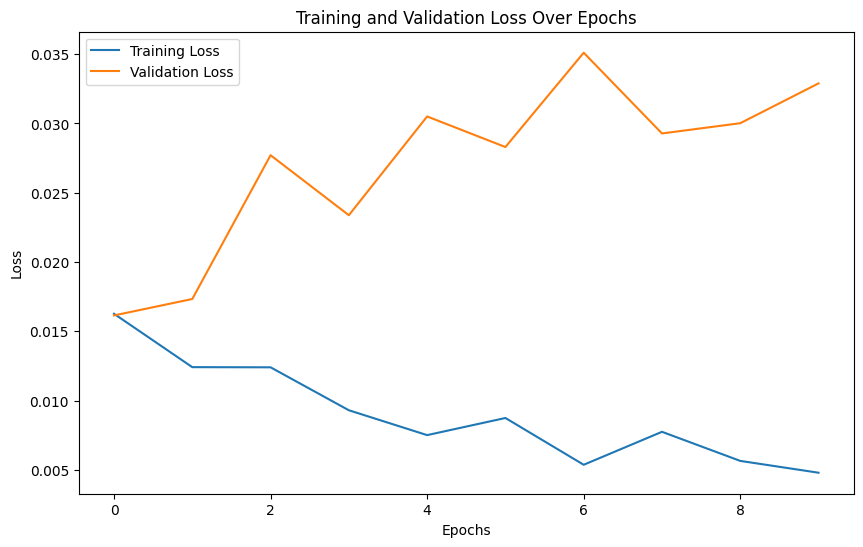

In [45]:
# Train the model and capture the history
history = model.fit(X_train_flattened, y_train, epochs=10, validation_split=0.2)

# Extract the loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

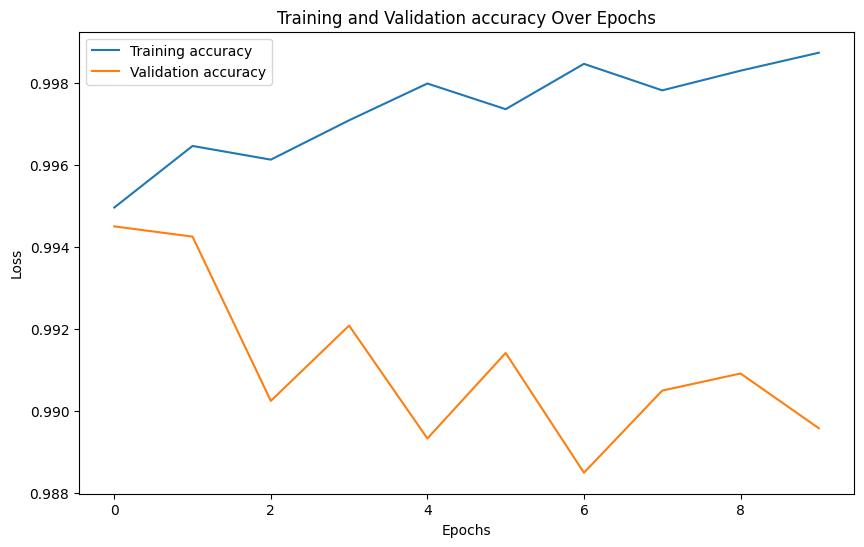

In [56]:
# Extract the accuracy values
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation accuracy Over Epochs')
plt.legend()
plt.show()

***Expected Behaviour of the curves***
* **Training Loss Curve**: Generally, the training loss decreases over epochs as the model learns from the training data. It might not always decrease smoothly due to factors like learning rate adjustments or batch variations, but the overall trend should be downward.

* **Validation Loss Curve**: The validation loss, ideally, should also decrease initially as the model improves its performance on both the training and validation data. However, if the model starts to overfit (memorize the training data too well), the validation loss may start to increase even as the training loss continues to decrease.

***Observation***

So, while observing the loss curves we see that training loss curve is decreasing over epochs as expected but the validation loss curve is increasing over epochs.

It means that the model's performance on data it hasn't seen (validation set) is deteriorating. This happens when the model fails to generalize and makes poorer predictions on new data compared to what it achieved during training.

***Addressing overfitting***

To mitigate overfitting and improve the model's generalization ability, we can consider several strategies:
* **Increase Training Data**
* **Early Stopping**: Monitor the validation loss during training and stop training when the validation loss stops improving, or starts to worsen, even if the training loss is still decreasing.
* **Simplify the Model**: Reduce the complexity of your model by decreasing the number of layers or neurons. A simpler model is less likely to overfit.
* **Cross-Validation**: Use techniques like k-fold cross-validation to better estimate the model's performance and generalize its ability.

## Model Evaluation

In [57]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0981 - accuracy: 0.9795


[0.0980907529592514, 0.9794999957084656]

This model achieved a **test accuracy** of approximately **97.95%**, with a corresponding **loss** of about **0.0981**. These results suggest that your model is performing quite well on the test data, indicating **successful training** and **reasonable generalization** from the training phase.

## Predictions

Now lets make some predictions and observe.

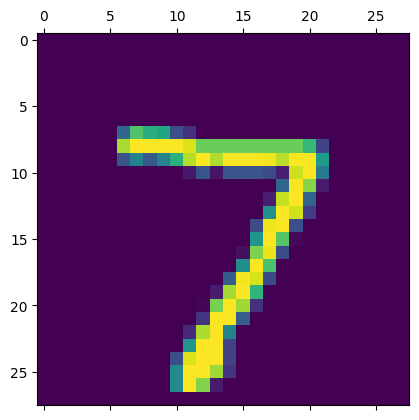

In [58]:
plt.matshow(X_test[0])

In [59]:
y_predicted=model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([7.5176746e-02, 4.5783449e-06, 7.5756796e-02, 9.4401854e-01,
       1.0687792e-11, 1.2288453e-07, 1.1897971e-14, 9.9999994e-01,
       5.4452959e-03, 5.3177271e-02], dtype=float32)

In [60]:
np.argmax(y_predicted[0])

7



> Alright!!! our model predicted the digit correctly.



Now lets predict the first 5 digits directly and see what will be the predictions.

In [62]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [63]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

> Bravo!!! We got the right predictions.

Lets create confusion matrix

In [64]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    0,    0,    0,    1,    1,    2,    1,    3,    0],
       [   1, 1124,    3,    2,    0,    0,    2,    1,    2,    0],
       [   3,    0, 1014,    2,    2,    0,    3,    4,    4,    0],
       [   0,    0,    7,  978,    0,    5,    1,    7,    5,    7],
       [   1,    1,    1,    0,  967,    0,    4,    1,    0,    7],
       [   2,    0,    1,    5,    2,  871,    3,    0,    6,    2],
       [   1,    2,    1,    1,    2,    3,  948,    0,    0,    0],
       [   2,    5,   11,    0,    3,    0,    0,  995,    3,    9],
       [   1,    0,    9,    5,    4,    7,    1,    1,  939,    7],
       [   5,    2,    1,    0,    7,    4,    0,    1,    2,  987]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

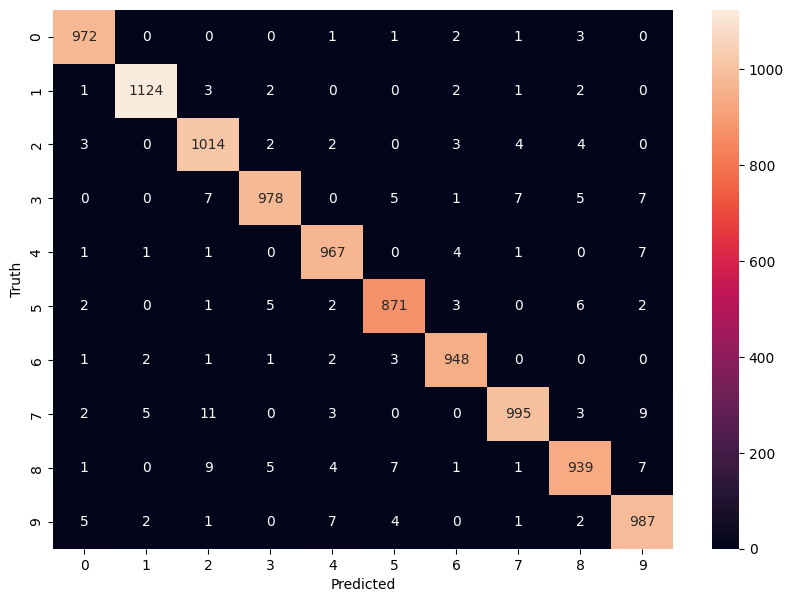

In [65]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

From the above matrix we can observe that, 972 times our model predicted the digit 0 as 0. Similarly, 1124 times our model predicted the digit 1 as 1.

So the numbers other than the diagonal are simply error made by our model.
for example: as you can see, 3 times our model falsely predicted the digit 2 as 0. Similarly, 7 times our model falsely predicted the digit 8 as 9.